In [3]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.8 MB/s eta 0:00:00


Best Hyperparameters: OrderedDict([('max_depth', 17), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 163)])
Accuracy of the Best Model: 1.0


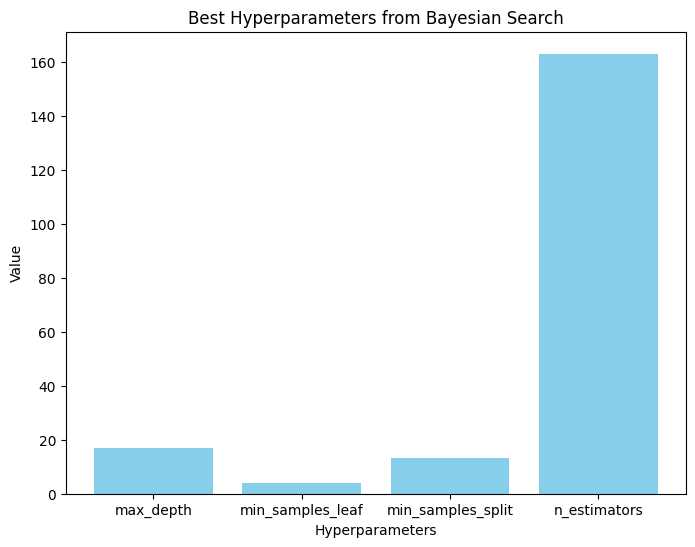

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from skopt import BayesSearchCV  # Bayesian Optimization for hyperparameter tuning

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define the model (RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Step 4: Define the parameter search space for Bayesian Optimization
param_space = {
    'n_estimators': (10, 200),  # Range for number of estimators
    'max_depth': (2, 20),        # Range for max_depth of trees
    'min_samples_split': (2, 20),# Range for min_samples_split
    'min_samples_leaf': (1, 20)  # Range for min_samples_leaf
}
bayes_search = BayesSearchCV(model, param_space, n_iter=10, cv=3, n_jobs=-1, random_state=42)
bayes_search.fit(X_train, y_train)
best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy of the Best Model:", accuracy)
plt.figure(figsize=(8, 6))
param_names = [str(k) for k in best_params.keys()]  # Convert keys to string
param_values = [v for v in best_params.values()]  # Get the values
plt.bar(param_names, param_values, color='skyblue')
plt.title('Best Hyperparameters from Bayesian Search')
plt.ylabel('Value')
plt.xlabel('Hyperparameters')
plt.show()